#EDA and Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

#Check first few rows

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape   #check shape(no. of rows and columns)

(41188, 21)

# Summary statistics for numerical features

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.info() #Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#Find duplicate rows and handle them

In [ ]:
num_of_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_of_duplicates}")
df = df.drop_duplicates()

Number of duplicate rows: 12


In [ ]:
# Count the class labels
class_sum = df['y'].value_counts()
# Display the counts of the target column
print(class_sum)

y
no     36537
yes     4639
Name: count, dtype: int64


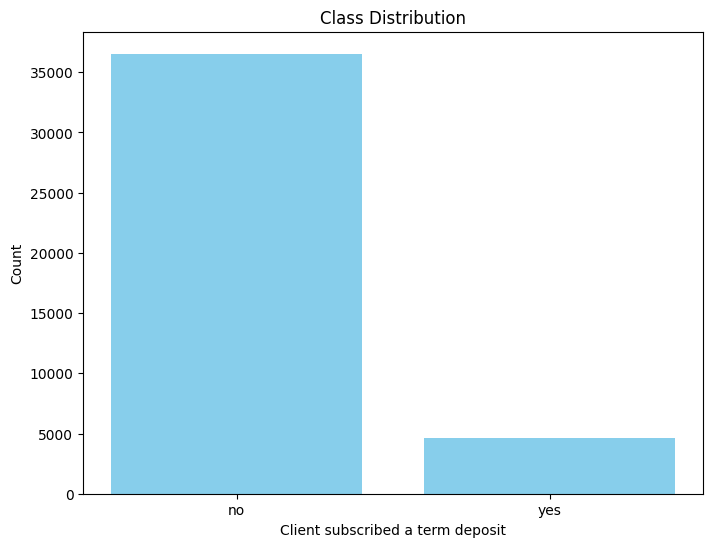

In [ ]:
#Visualization
plt.figure(figsize=(8, 6))
plt.bar(class_sum.index, class_sum.values, color = 'skyblue')

plt.title('Class Distribution')
plt.xlabel('Client subscribed a term deposit')
plt.ylabel('Count')
plt.show()

In [ ]:
# Replace "unknown" with NaN for easier handling
df.replace("unknown", pd.NA, inplace=True)
df.isna().sum()

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
        mode_value = df[column].mode()[0]  # Get the mode
        df[column].fillna(mode_value, inplace=True)  # Replace NaN with mode

<ipython-input-259-afe1d9f6d9f0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Replace NaN with mode


In [ ]:
df.isna().sum()  #To confirm the number of null values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10749,25001,13894,41173,22561,34928,26135,13767,8618,35551,36537


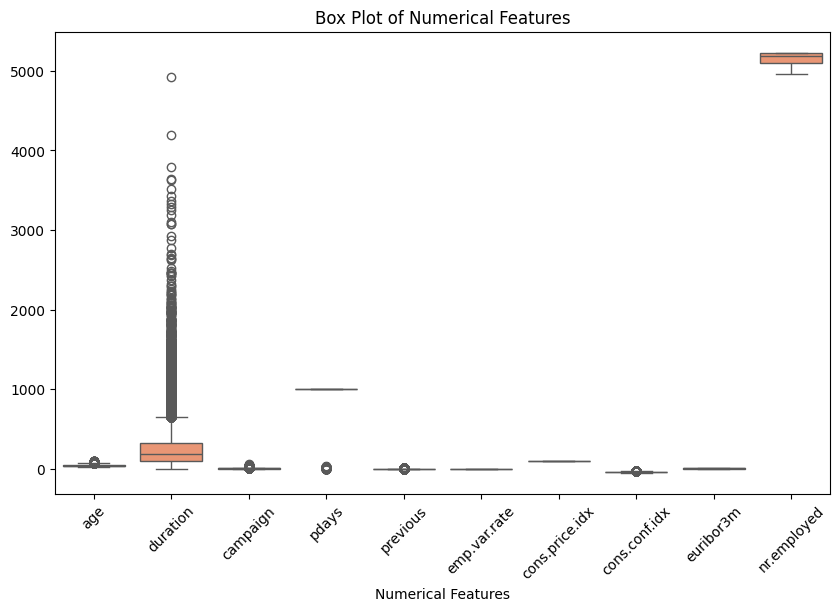

In [ ]:
# Create a box plot for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Set2")

# Set title and labels
plt.title("Box Plot of Numerical Features")
plt.xlabel("Numerical Features")

# Adjust x-ticks for better spacing
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

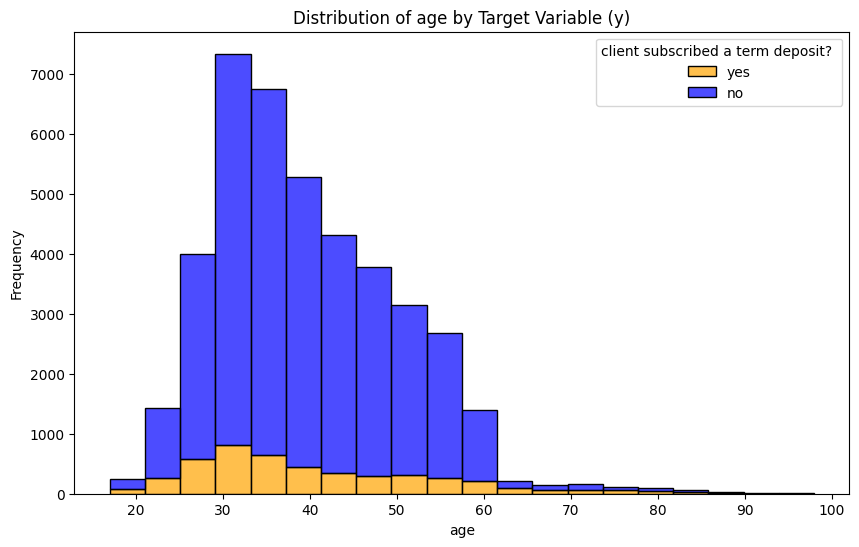

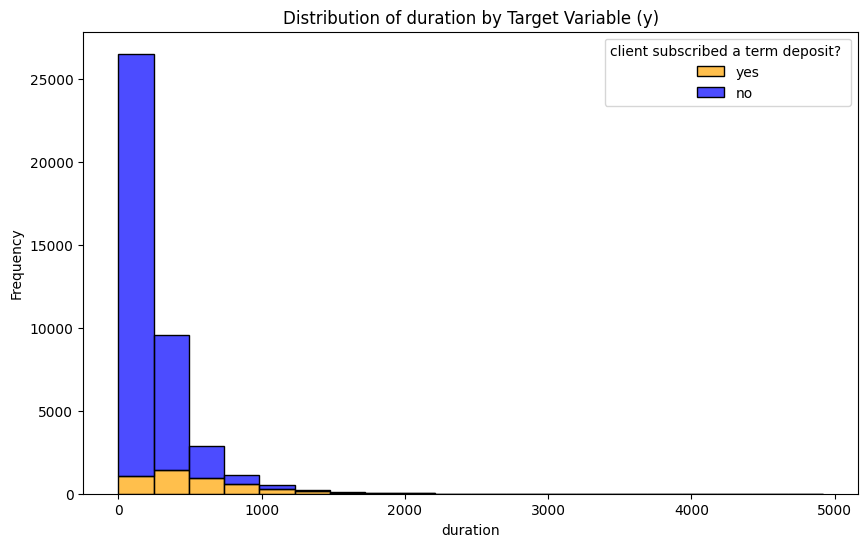

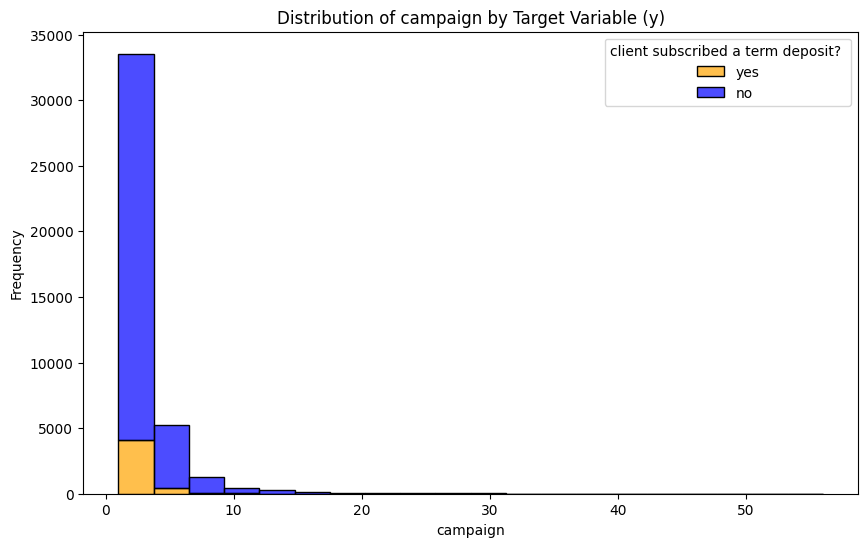

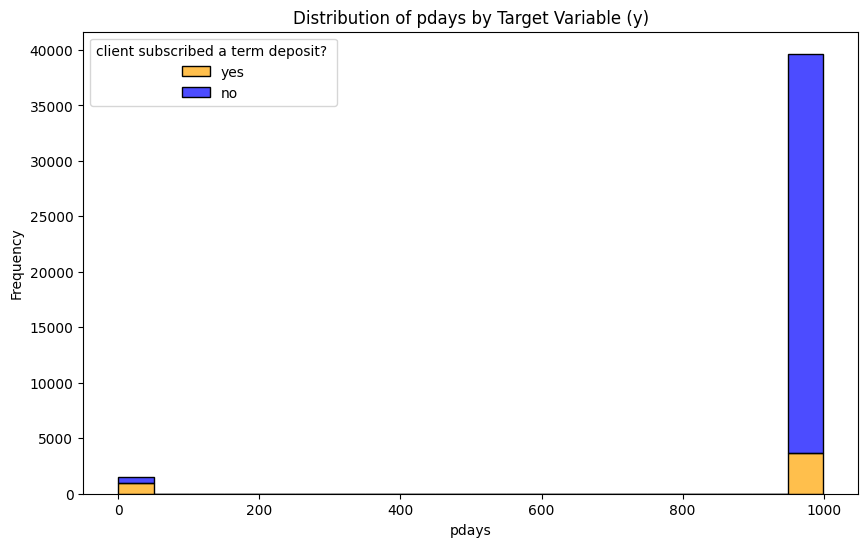

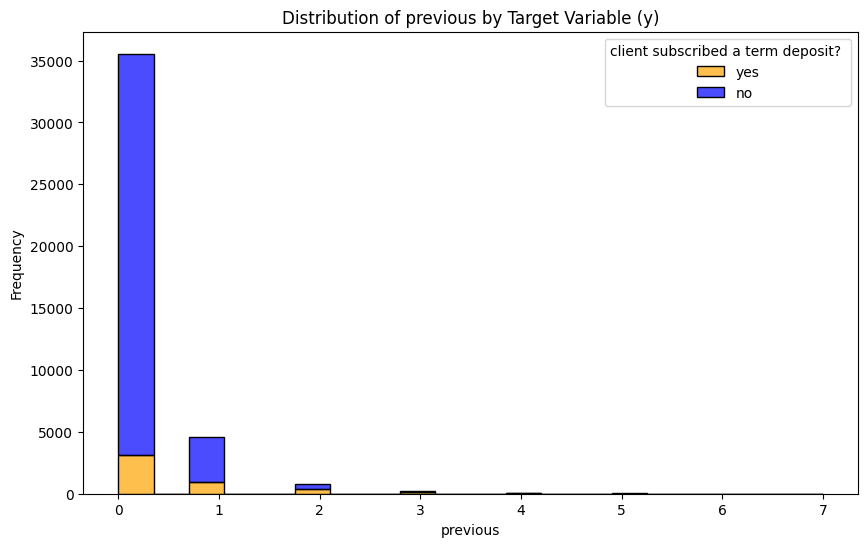

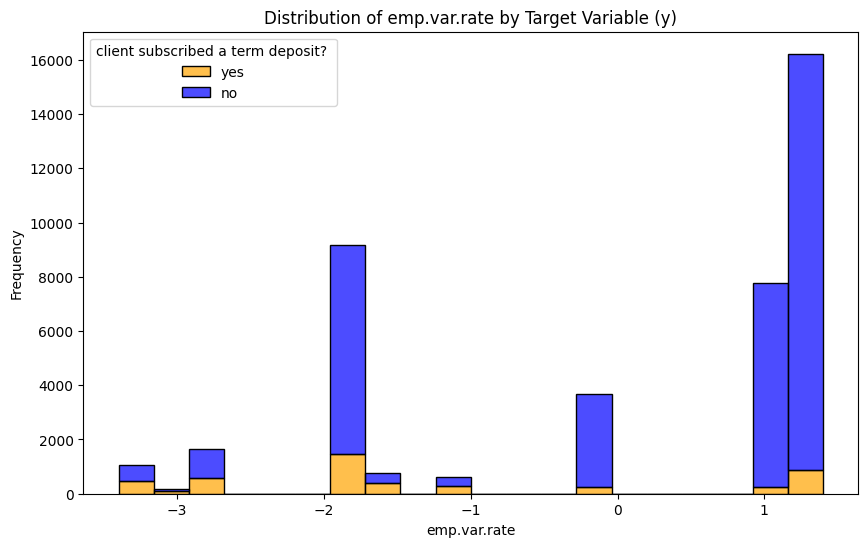

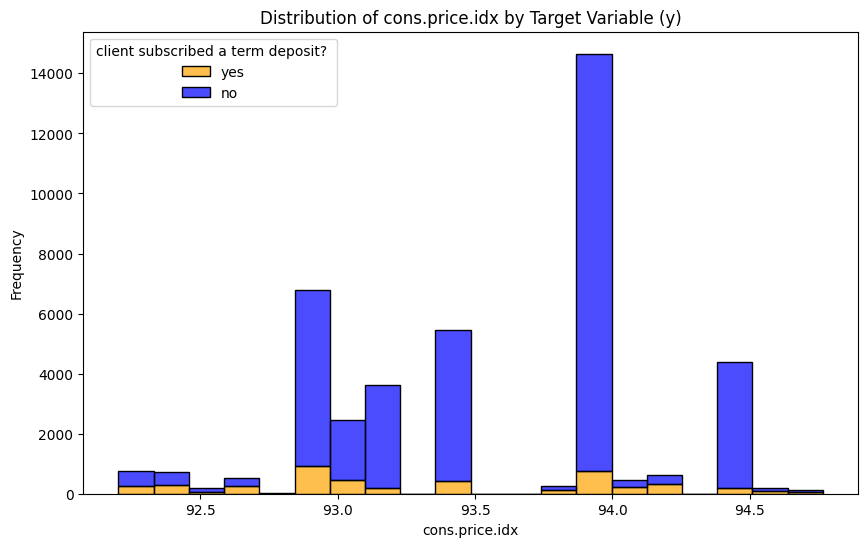

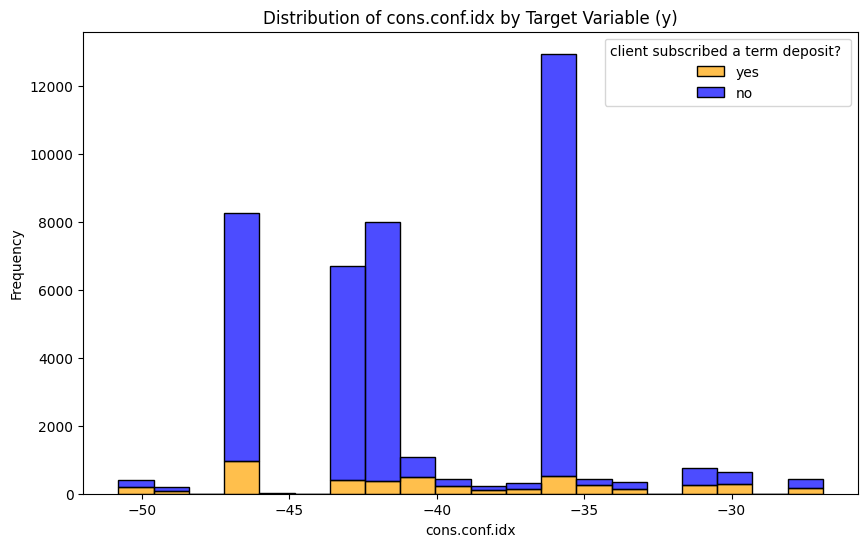

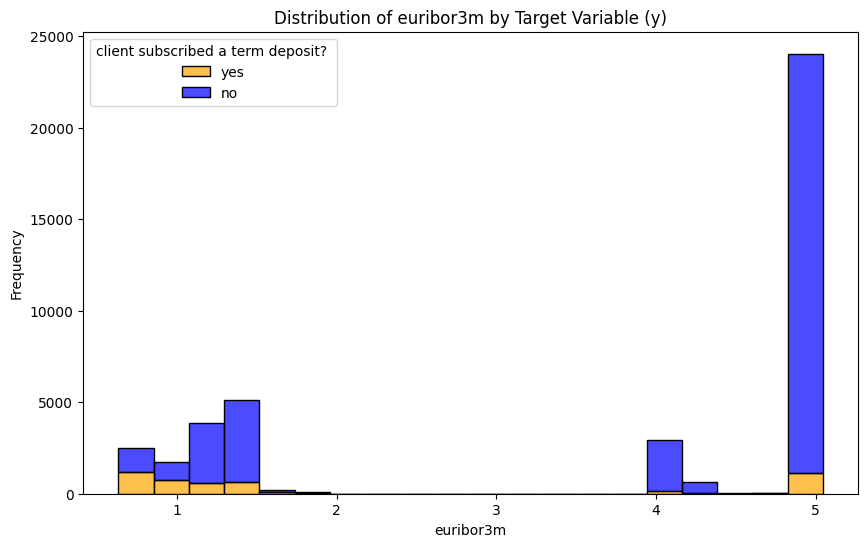

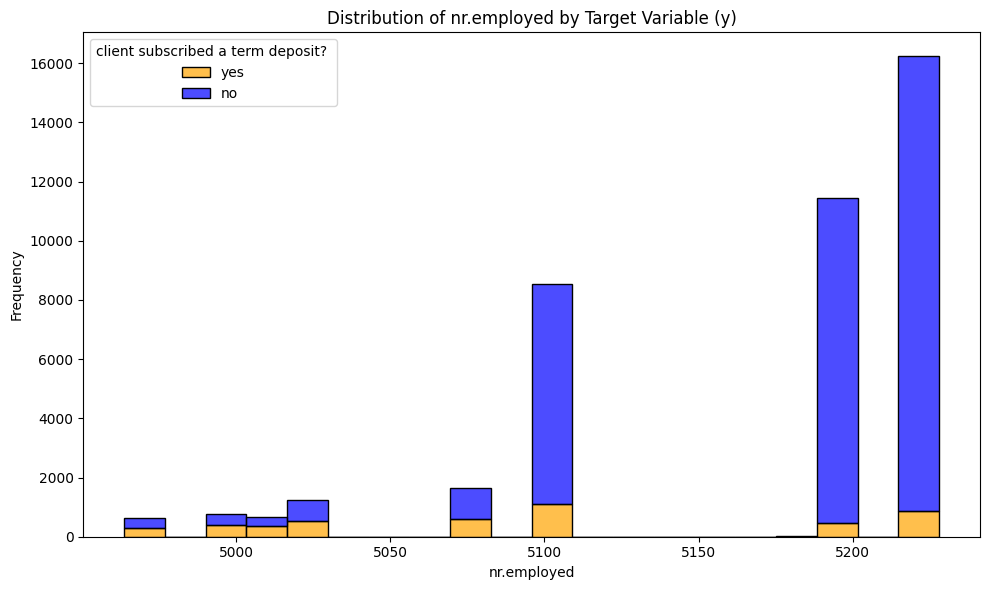

In [ ]:
# List of numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx',
                      'cons.conf.idx', 'euribor3m', 'nr.employed']
yes_color = 'orange'
no_color = 'blue'
for idx, col in enumerate(numerical_features, start=1):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='y', bins=20, palette={'yes':yes_color, 'no':no_color}, alpha=0.7, multiple='stack')
    plt.title(f"Distribution of {col} by Target Variable (y)")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='client subscribed a term deposit? ', labels=['yes', 'no'])
plt.tight_layout()
plt.show()


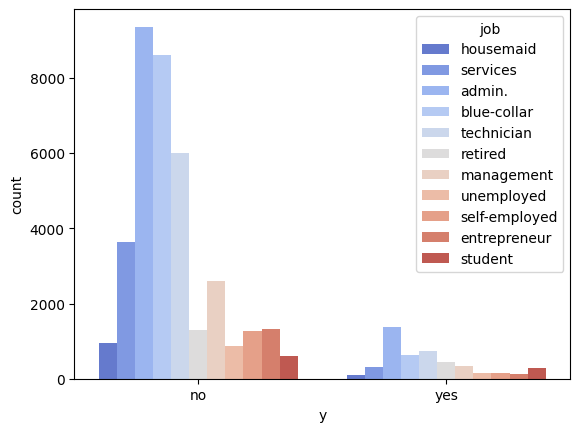

In [ ]:
# Plot depicting the y(dependant variable) for each job and the count
sns.countplot(x='y', palette='coolwarm', hue='job', data=df);


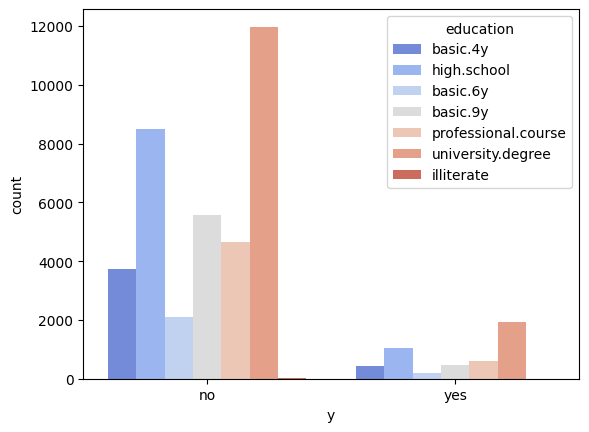

In [ ]:
# Plot depicting the y(dependant variable) for each  and the count
sns.countplot(x='y', palette='coolwarm', hue='education', data=df);

#Handling Outliers

In [ ]:
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers[col] = outlier_indices
    return outliers

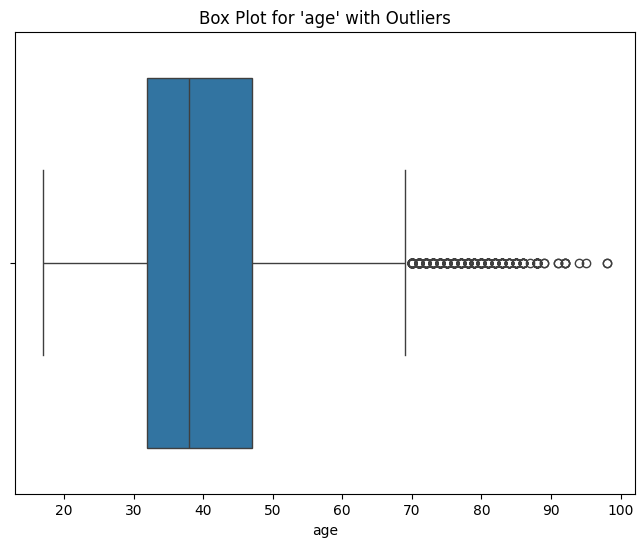

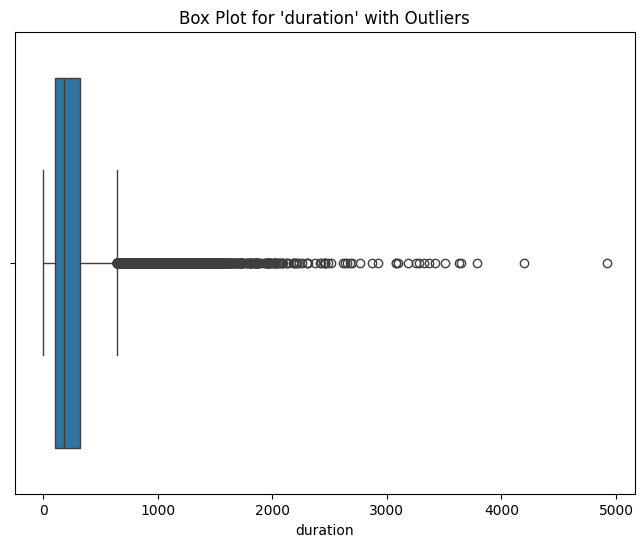

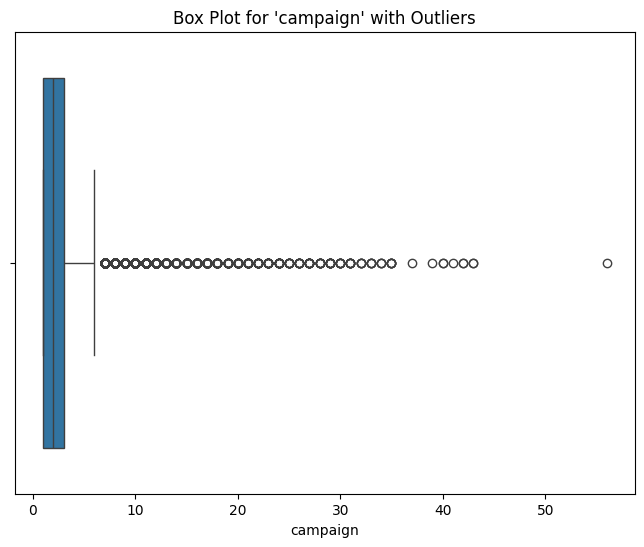

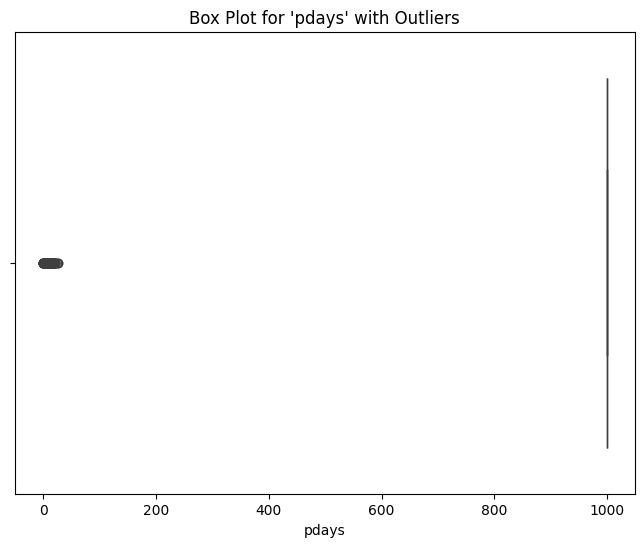

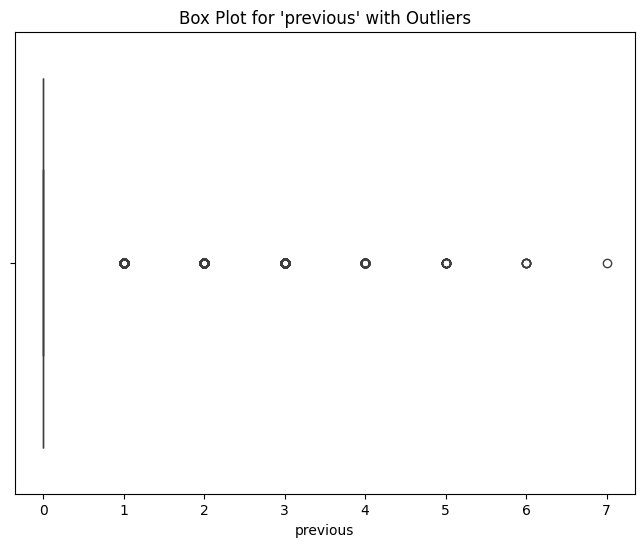

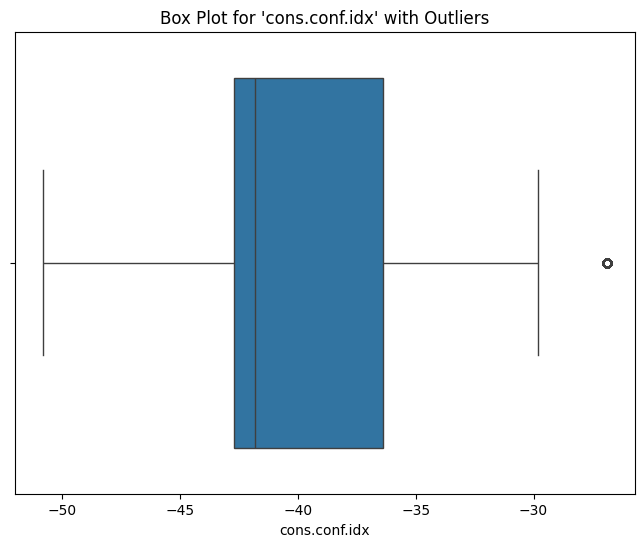

In [ ]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx',
                      'cons.conf.idx', 'euribor3m', 'nr.employed']

outlier_indices = detect_outliers_iqr(df, numerical_features)

# Visualize outliers using box plots
for col, indices in outlier_indices.items():
    if len(indices) > 0:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title("Box Plot for '{}' with Outliers".format(col))
        plt.show()


In [ ]:
#removing outliers of age
def remove_outliers(data):
    Q1_age = np.percentile(data['age'], 25)
    Q3_age = np.percentile(data['age'], 75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    return data[(data['age'] >= lower_bound_age) & (data['age'] <= upper_bound_age)]

# Remove outliers from 'age' column
df_outage = remove_outliers(df)

# Check the shape of the dataframe before and after removing outliers
print("Shape of original dataframe:", df.shape)
print("Shape of dataframe after removing outliers from 'age' column:", df_outage.shape)

Shape of original dataframe: (41176, 21)
Shape of dataframe after removing outliers from 'age' column: (40708, 21)


In [ ]:
#removing outliers of campaign
def remove_outliers(data):
    Q1_age = np.percentile(data['campaign'], 25)
    Q3_age = np.percentile(data['campaign'], 75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    return data[(data['campaign'] >= lower_bound_age) & (data['campaign'] <= upper_bound_age)]

# Remove outliers from 'campaign' column
df_outcampaign = remove_outliers(df_outage)

# Check the shape of the dataframe before and after removing outliers
print("Shape of original dataframe:", df_outage.shape)
print("Shape of dataframe after removing outliers from 'campaign' column:", df_outcampaign.shape)

Shape of original dataframe: (40708, 21)
Shape of dataframe after removing outliers from 'campaign' column: (38316, 21)


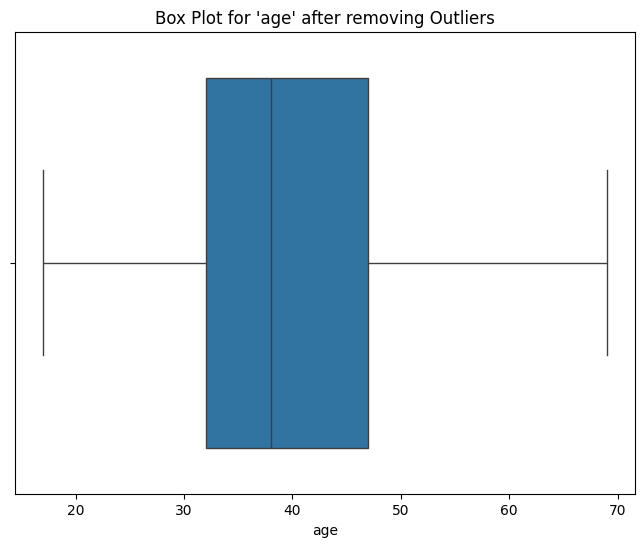

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_outcampaign['age'])
plt.title("Box Plot for '{}' after removing Outliers".format('age'))
plt.show()

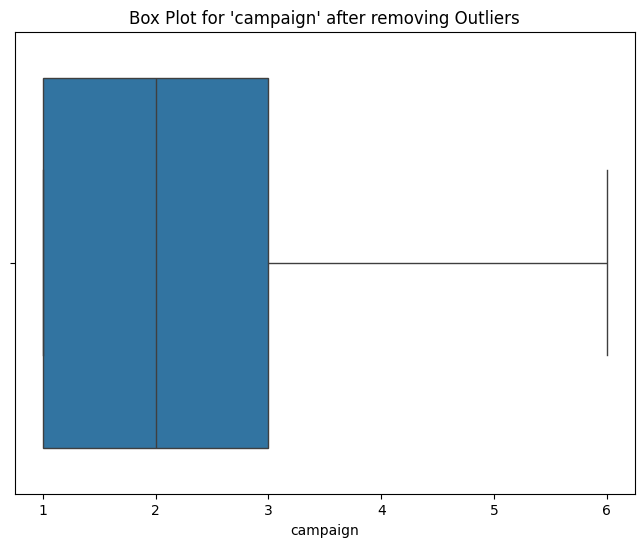

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_outcampaign['campaign'])
plt.title("Box Plot for '{}' after removing Outliers".format('campaign'))
plt.show()

In [ ]:
df = df_outcampaign

#Feature Engineering

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop(['duration'], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Categorize the `pdays` column
def categorize_pdays(value):
    if value == 999:
        return "Not Contacted"
    elif value <= 7:
        return "Recently Contacted"
    else:
        return "Contacted Earlier"

df['pdays'] = df['pdays'].apply(categorize_pdays)

# Step 2: Encode the `pdays` column and other categorical features
categorical_columns = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome', 'pdays'  # Include `pdays` here after categorization
]

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Encode the dependent variable (y)
df['y'] = le.fit_transform(df['y'])

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


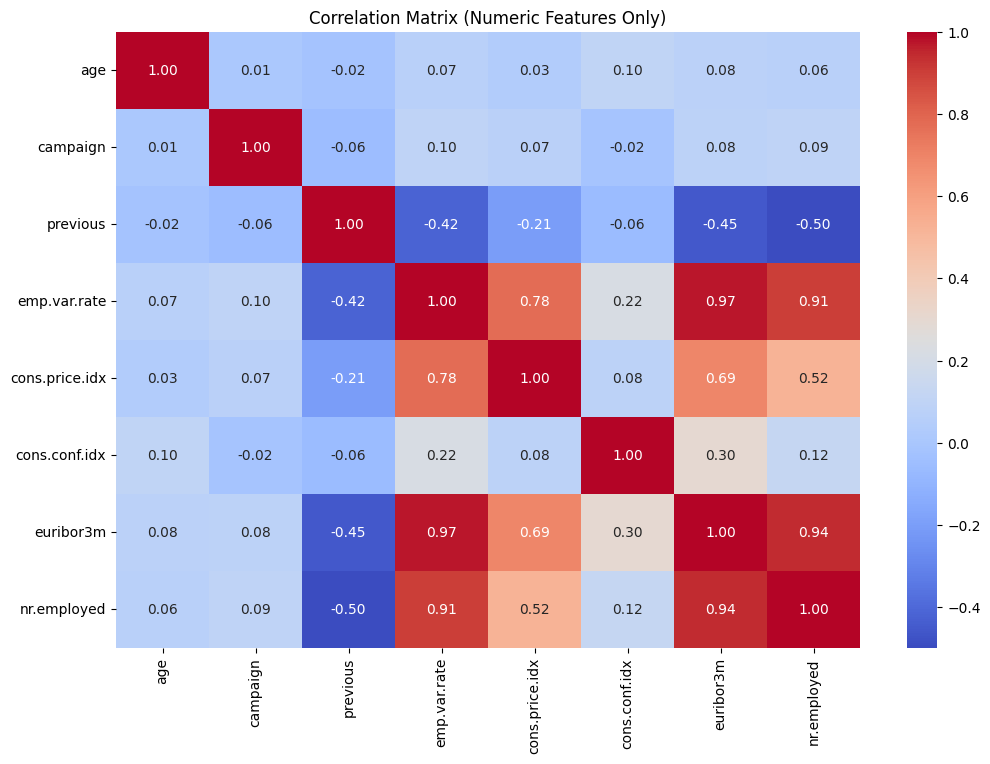

In [ ]:
from sklearn.preprocessing import StandardScaler
excluded_columns = categorical_columns + ['y']

# Select numeric columns excluding the excluded ones
numeric_columns = df.drop(columns=excluded_columns).select_dtypes(include=['int64', 'float64']).columns

# Step 2: Standard Scaling for Numeric Features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 3: Compute Correlation Matrix
correlation_matrix = df[numeric_columns].corr()

# Step 4: Visualize Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

#Handling class inbalance

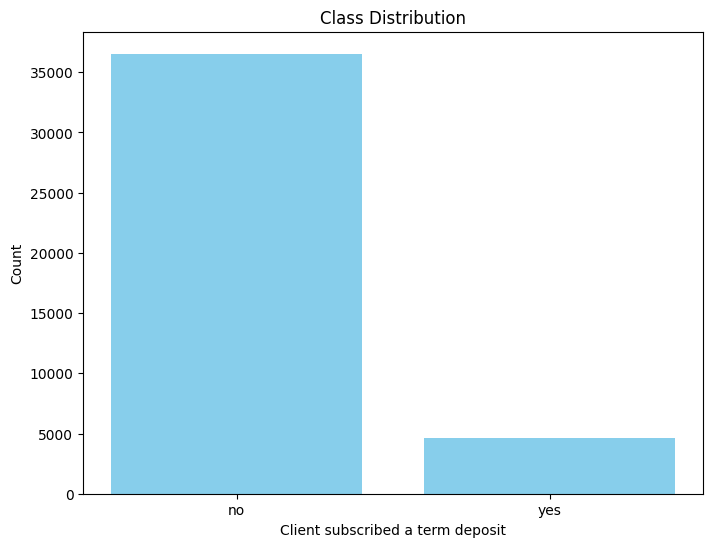

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(class_sum.index, class_sum.values, color = 'skyblue')
plt.title('Class Distribution')
plt.xlabel('Client subscribed a term deposit')
plt.ylabel('Count')
plt.show()






In [ ]:
from imblearn.over_sampling import SMOTE
# Create X and y variables
Y = df['y']
X = df.drop('y', axis=1)
# Initialize the RandomOverSampler
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Create a new balanced DataFrame
df_new = pd.concat([X_resampled, y_resampled], axis=1)

# Now, 'balanced_df' contains the balanced dataset



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


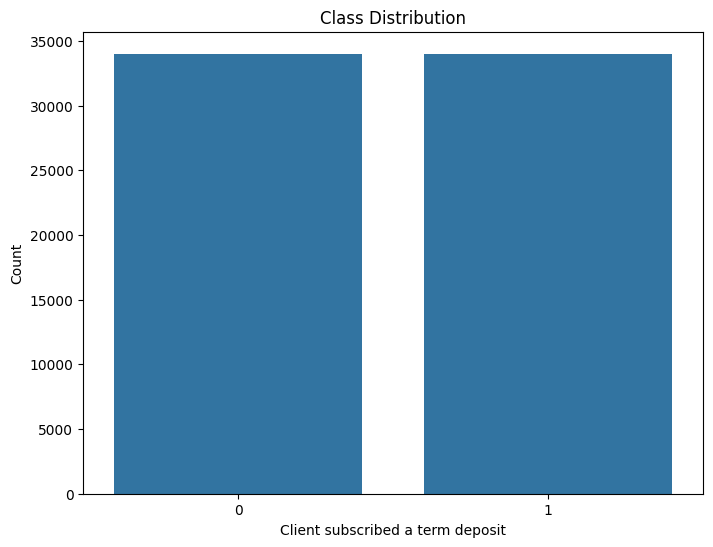

In [ ]:
y_counts = df_new['y'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=y_counts.index, y= y_counts.values)
plt.title('Class Distribution')
plt.xlabel('Client subscribed a term deposit')
plt.ylabel('Count')
plt.show()

#Building predictive model using Random Forest

In [ ]:
x = df_new.iloc[:,:-1] #independant variables
y = df_new.iloc[:,-1] #Dependant variable


In [ ]:
x.shape

(68010, 19)

In [ ]:
y.shape

(68010,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42) #Train test split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(x_train, y_train)
pred_classifier = classifier.predict(x_test)

print("Acc on training data: {:,.3f}".format(classifier.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(classifier.score(x_test, y_test)))


Acc on training data: 0.996
Acc on test data: 0.926


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_classifier))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6737
           1       0.93      0.92      0.93      6865

    accuracy                           0.93     13602
   macro avg       0.93      0.93      0.93     13602
weighted avg       0.93      0.93      0.93     13602



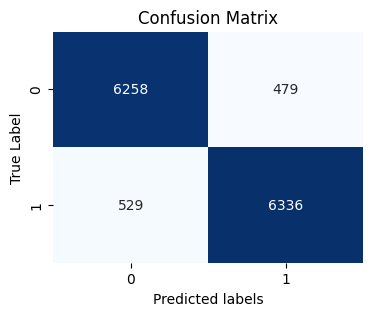

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix2 = confusion_matrix(y_test, pred_classifier)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_classifier)*100)

92.5893250992501


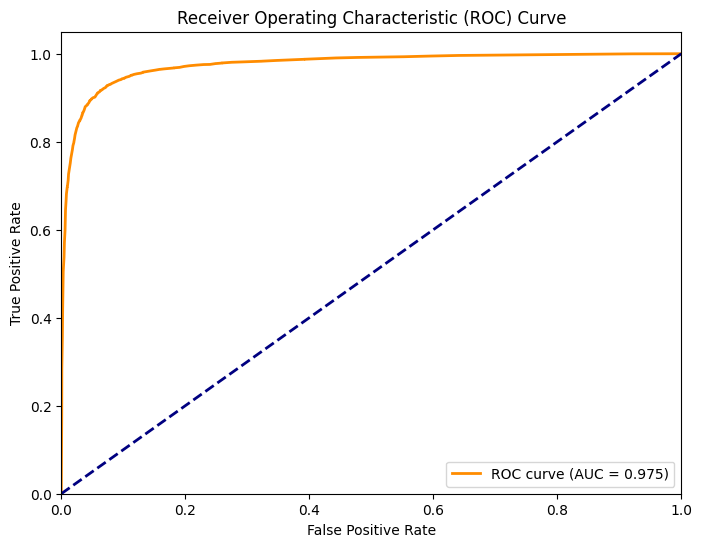

AUC Score: 0.975


In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get prediction probabilities for the positive class
y_pred_proba = classifier.predict_proba(x_test)[:,1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')

#Building Predictive Model using ANN

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Convert target to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [ ]:
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.3f}')

Epoch 1/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7186 - loss: 0.5509 - val_accuracy: 0.7520 - val_loss: 0.5103
Epoch 2/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7509 - loss: 0.5095 - val_accuracy: 0.7551 - val_loss: 0.5029
Epoch 3/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7568 - loss: 0.5024 - val_accuracy: 0.7553 - val_loss: 0.5011
Epoch 4/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7570 - loss: 0.5002 - val_accuracy: 0.7602 - val_loss: 0.4944
Epoch 5/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7590 - loss: 0.4936 - val_accuracy: 0.7592 - val_loss: 0.4943
Epoch 6/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7601 - loss: 0.4911 - val_accuracy: 0.7644 - val_loss: 0.4897
Epoch 7/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7596 - loss: 0.4898 - val_accuracy: 0.7648 - val_loss: 0.4874
Epoch 8/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7662 - loss: 0.4886 - 

In [ ]:
# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_test_encoded, y_pred))


426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      6737
           1       0.81      0.77      0.79      6865

    accuracy                           0.79     13602
   macro avg       0.79      0.79      0.79     13602
weighted avg       0.79      0.79      0.79     13602



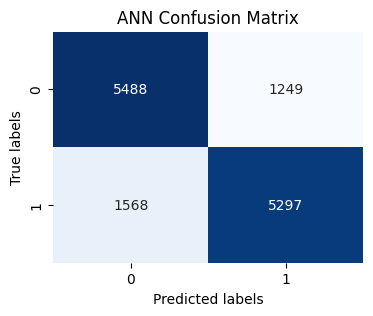

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('ANN Confusion Matrix')
plt.show()

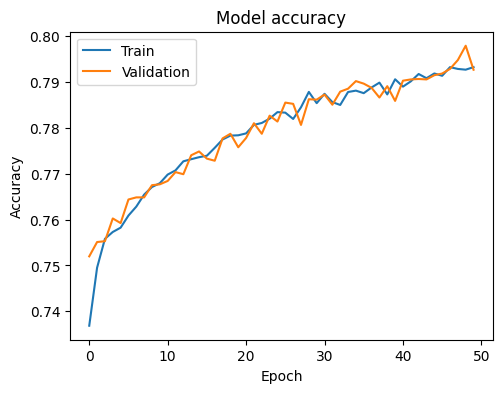

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


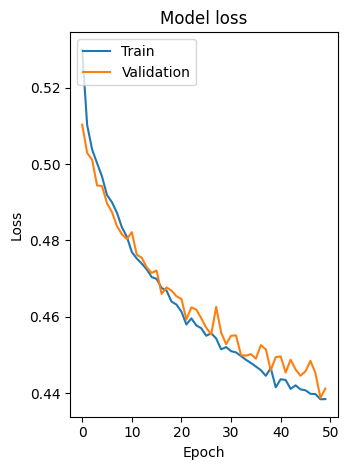

In [ ]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

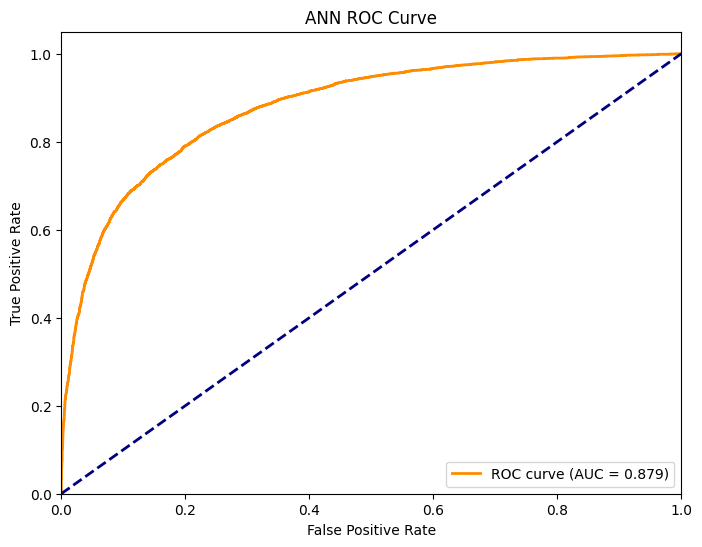


AUC Score: 0.879


In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'\nAUC Score: {roc_auc:.3f}')